In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [2]:
edustat = pd.read_excel("edustat_부울경.xlsx", index_col=0)

In [3]:
sum1 = edustat.groupby(['year', '시도', '대계열', '과정구분']).agg(졸업자_남자_비중=('졸업자중남자', 'mean'),
                                  졸업자_여자_비중=('졸업자중여자', 'mean'),
                                  취업자_남자_비중=('취업자중남자', 'mean'),
                                  취업자_여자_비중=('취업자중여자', 'mean'),
                                  전체_취업률=('취업률_계', 'mean'),
                                  남자_취업률=('남자취업률', 'mean'),
                                  여자_취업률=('여자취업률', 'mean'))
sum2 = edustat.groupby(['year', '시도', '대계열', '중계열', '과정구분']).agg(졸업자_남자_비중=('졸업자중남자', 'mean'),
                                  졸업자_여자_비중=('졸업자중여자', 'mean'),
                                  취업자_남자_비중=('취업자중남자', 'mean'),
                                  취업자_여자_비중=('취업자중여자', 'mean'),
                                  전체_취업률=('취업률_계', 'mean'),
                                  남자_취업률=('남자취업률', 'mean'),
                                  여자_취업률=('여자취업률', 'mean'))

In [4]:
sum11 = sum1.query('대계열 in ["공학계열", "자연계열"] & 과정구분 == "대학과정"')
sum21 = sum2.query('대계열 in ["공학계열", "자연계열"] & 과정구분 == "대학과정"')
sum11univ_sum = sum11.reset_index().query('대계열 == "공학계열"')
sum111 = sum11univ_sum.melt(id_vars = ['year', '시도', '대계열', '과정구분'])
sum12univ_sum = sum11.reset_index().query('대계열 == "자연계열"')
sum121 = sum12univ_sum.melt(id_vars = ['year', '시도', '대계열', '과정구분'])

sum211 = sum21.query('대계열 == "공학계열"').reset_index().melt(id_vars = ['year', '시도', '대계열', '중계열', '과정구분'])
sum221 = sum21.query('대계열 == "자연계열"').reset_index().melt(id_vars = ['year', '시도', '대계열', '중계열', '과정구분'])

# 대분류 시각화

## 서울과 부울경 공학계열 추세 
### overall

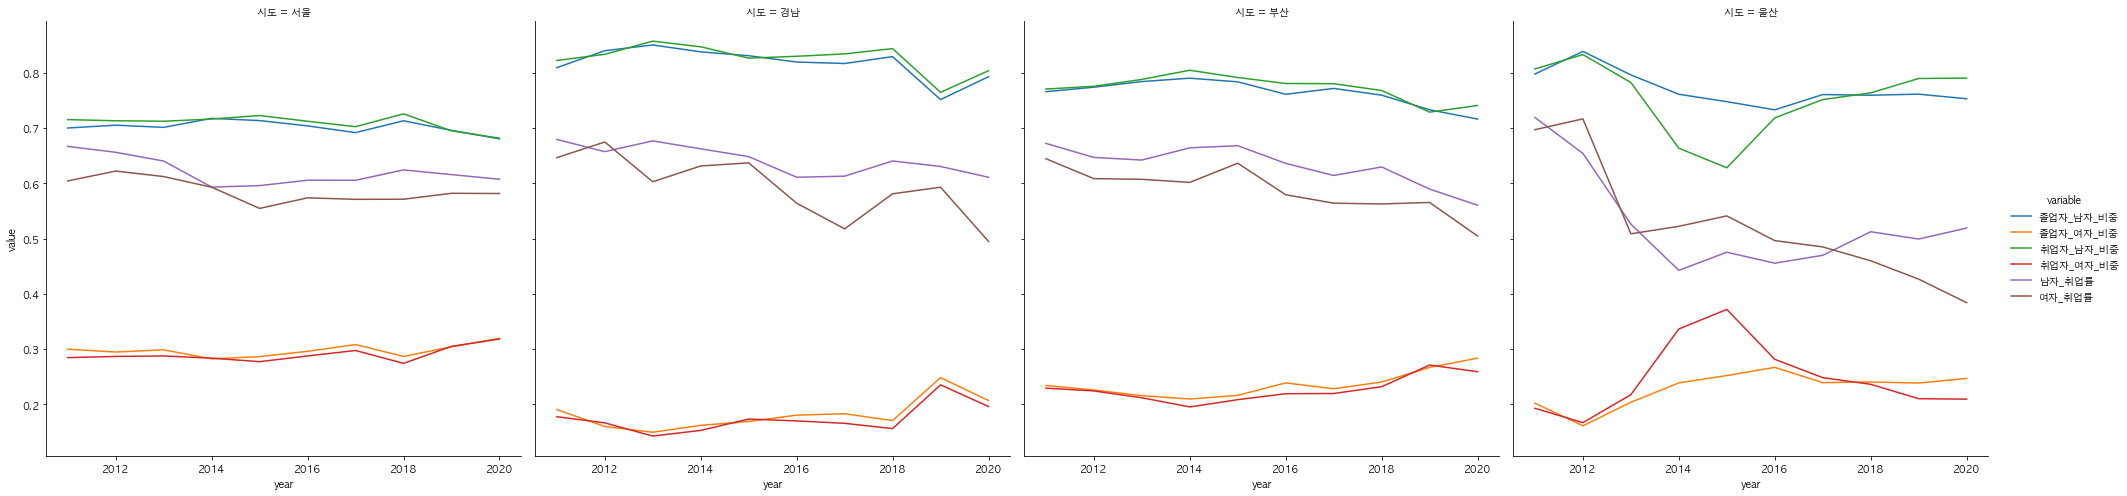

In [5]:
g = sns.relplot(data = sum111.query('variable != "전체_취업률"'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

### 졸업자 남녀 비중

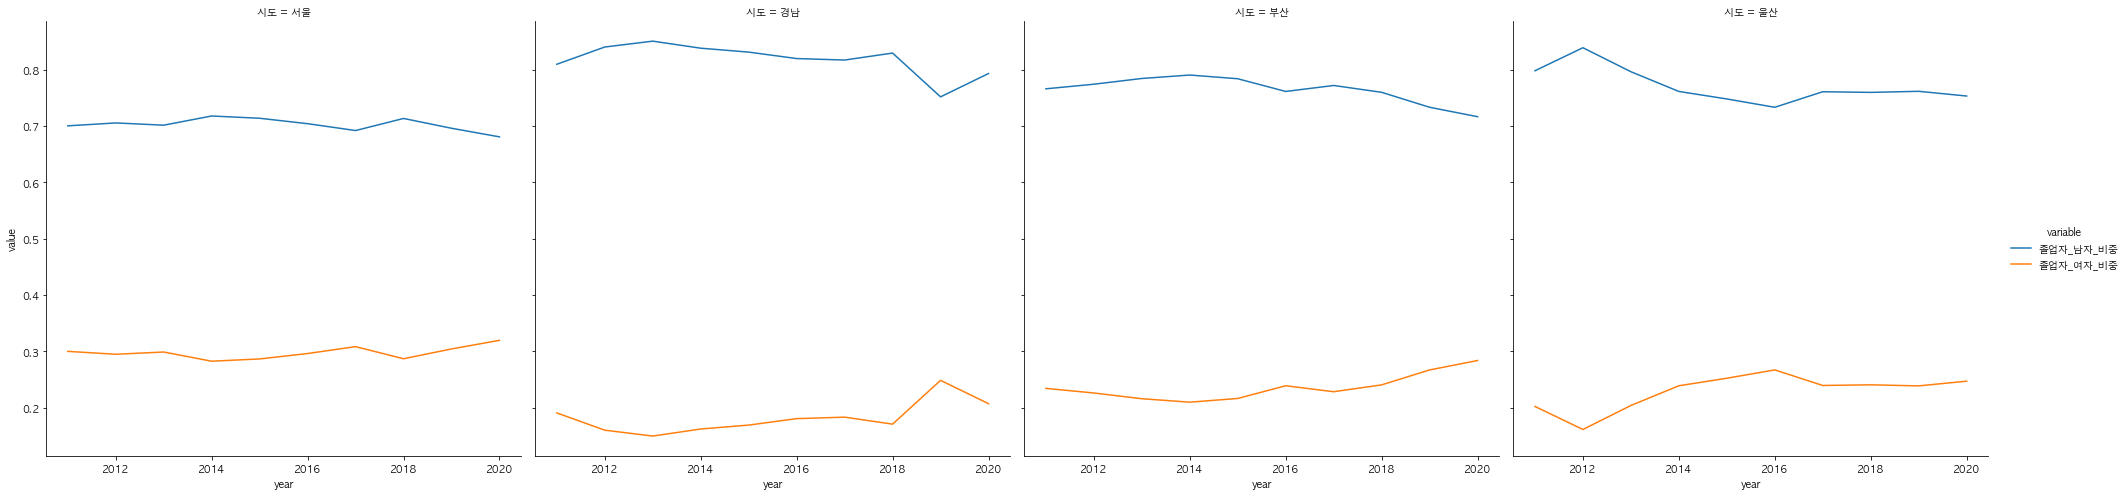

In [6]:
g = sns.relplot(data = sum111.query('variable in ["졸업자_남자_비중", "졸업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

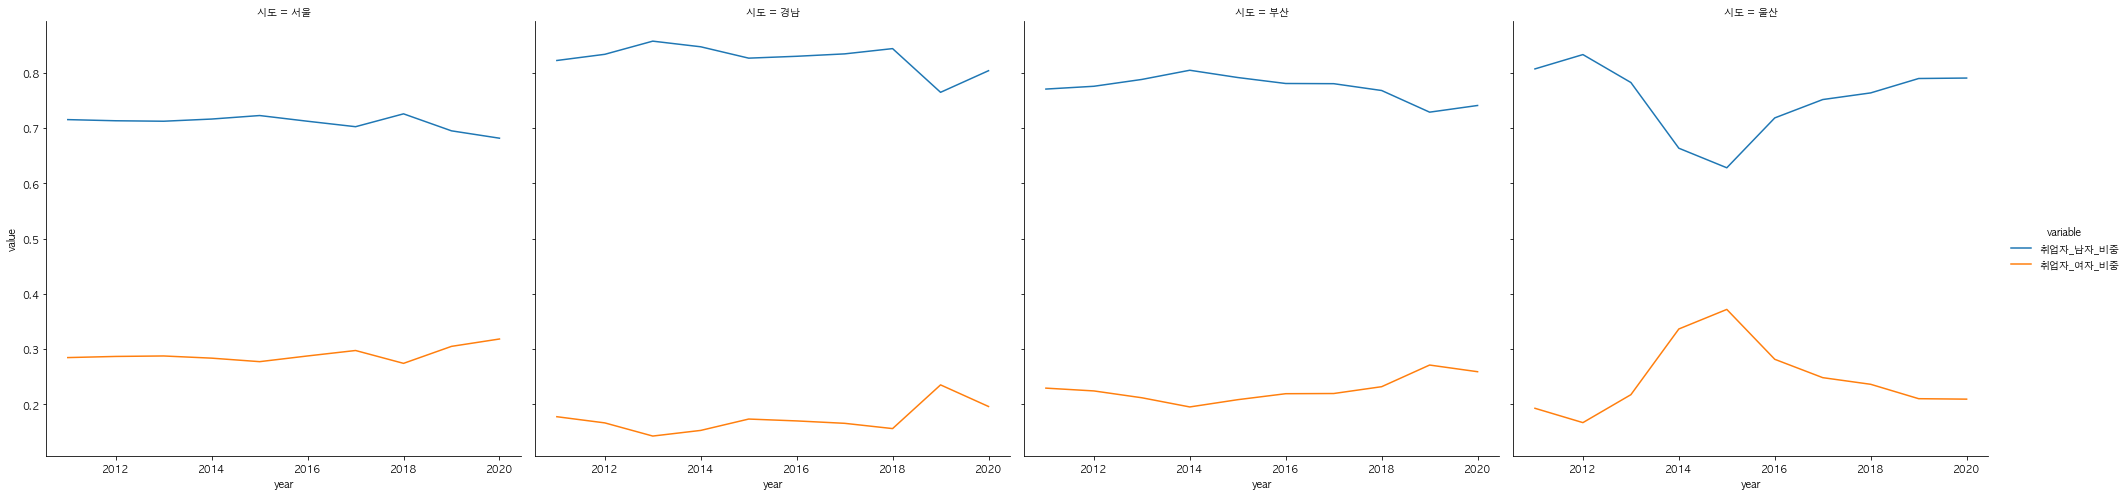

In [7]:
g = sns.relplot(data = sum111.query('variable in ["취업자_남자_비중", "취업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

### 남녀 취업률

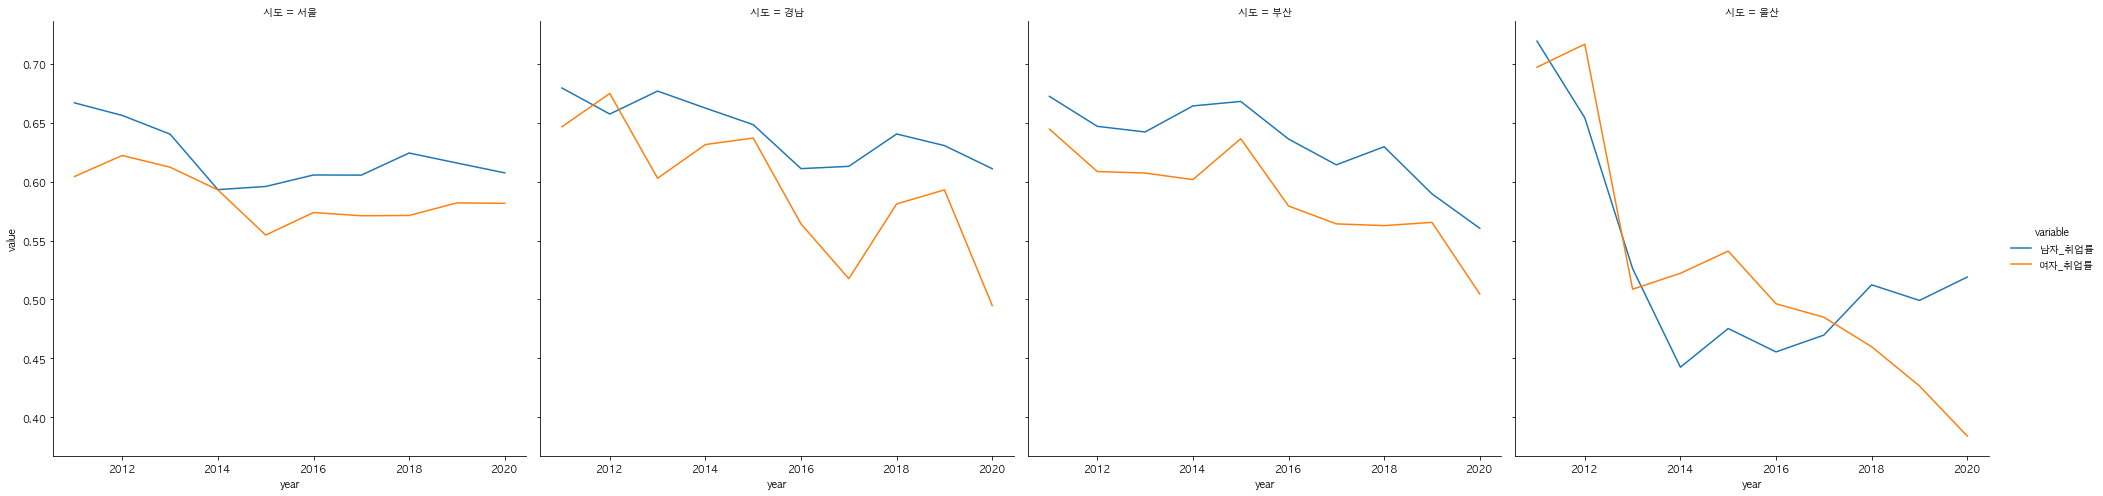

In [8]:
g = sns.relplot(data = sum111.query('variable in ["남자_취업률", "여자_취업률"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

## 서울과 부울경 자연계열 추세
### overall

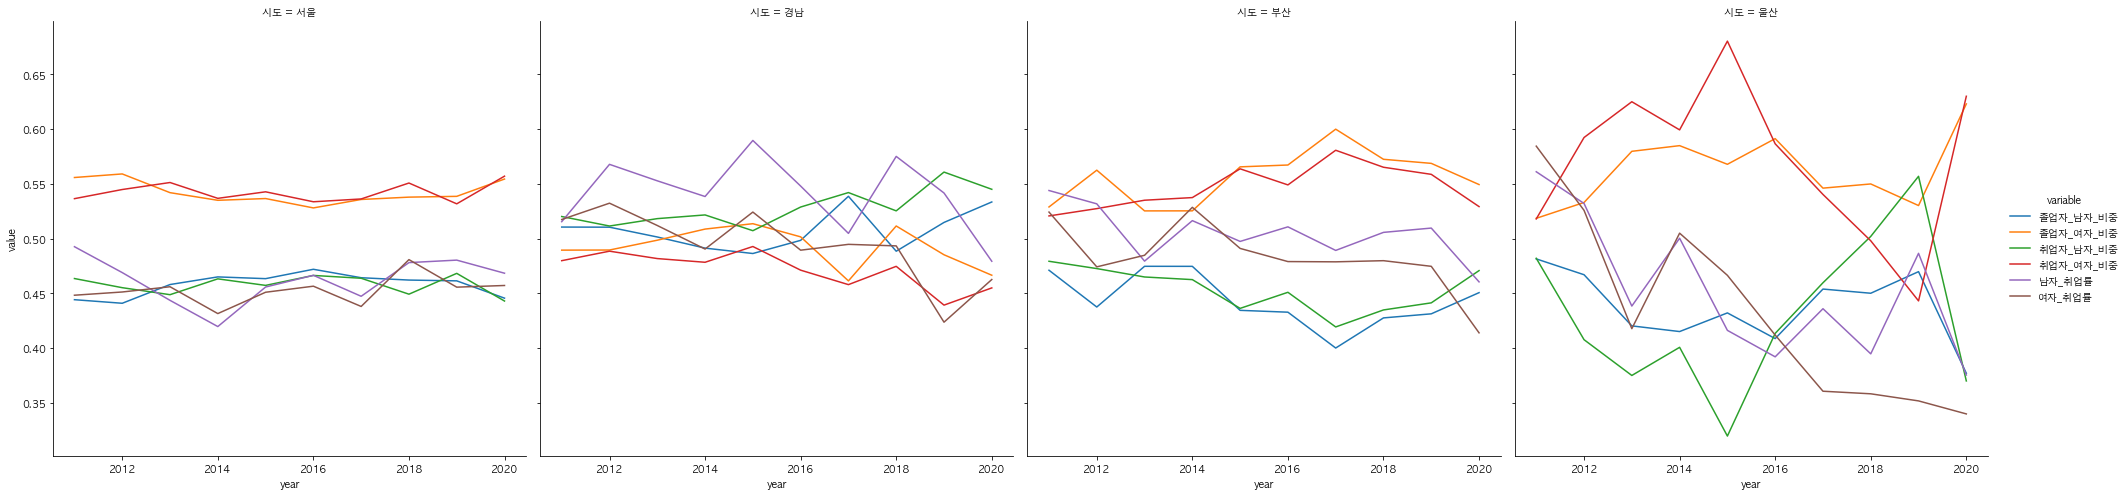

In [9]:
g = sns.relplot(data = sum121.query('variable != "전체_취업률"'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

### 졸업자 남녀 비중

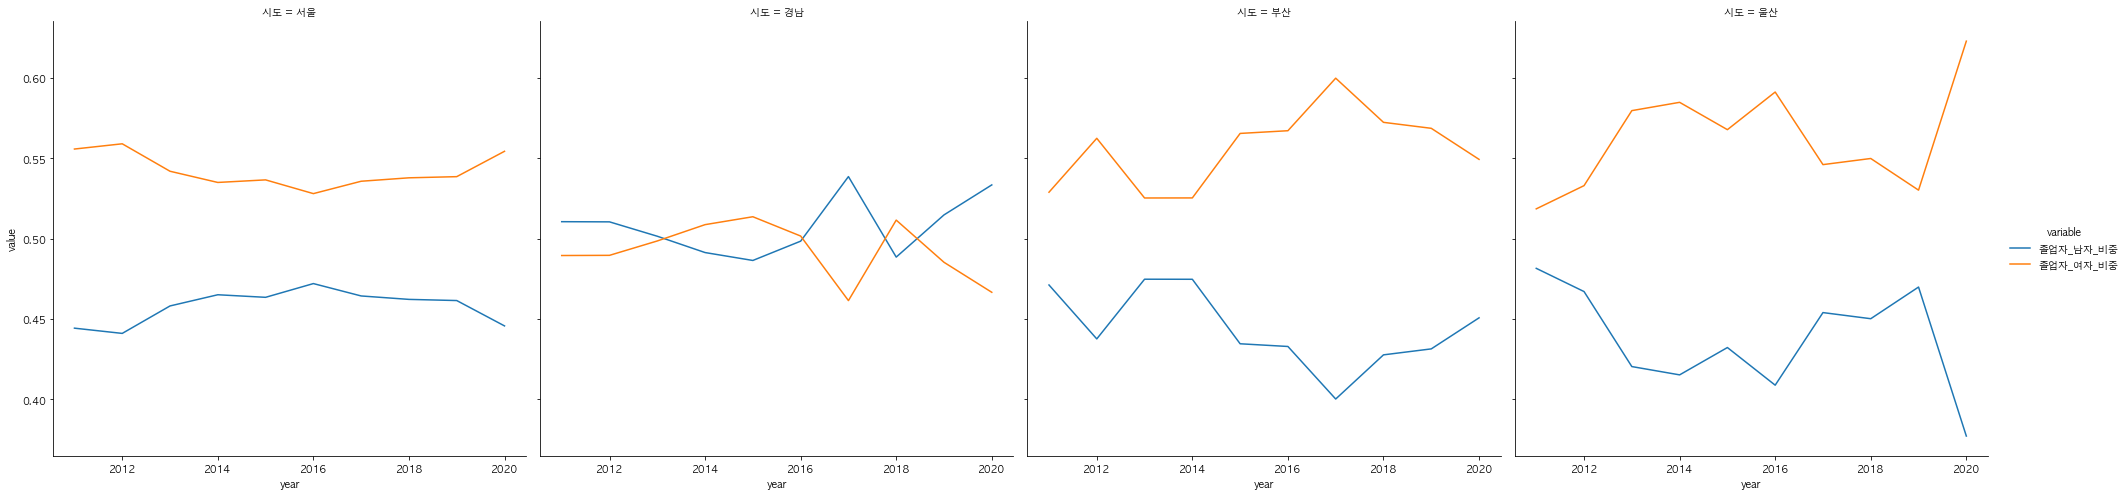

In [10]:
g = sns.relplot(data = sum121.query('variable in ["졸업자_남자_비중", "졸업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

### 취업자 중 남녀 비중

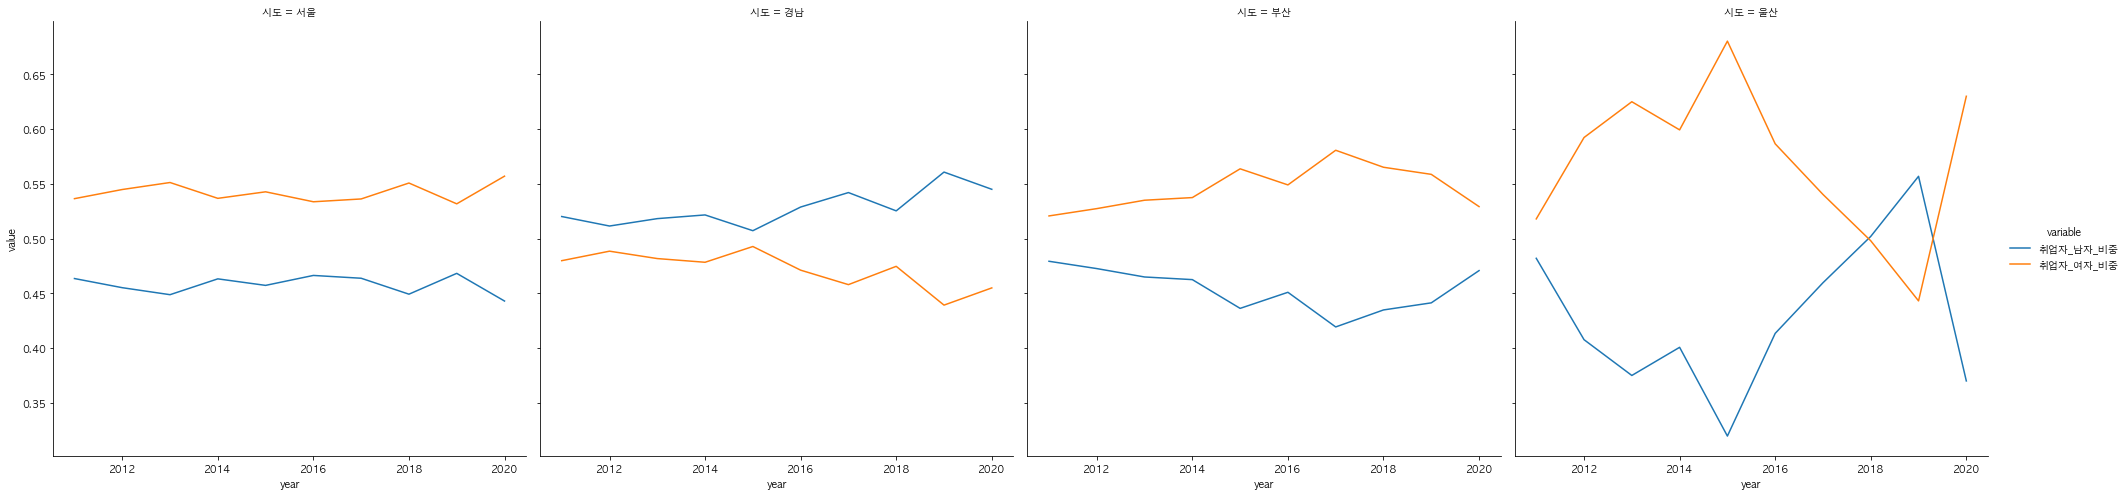

In [11]:
g = sns.relplot(data = sum121.query('variable in ["취업자_남자_비중", "취업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

### 남녀 취업률

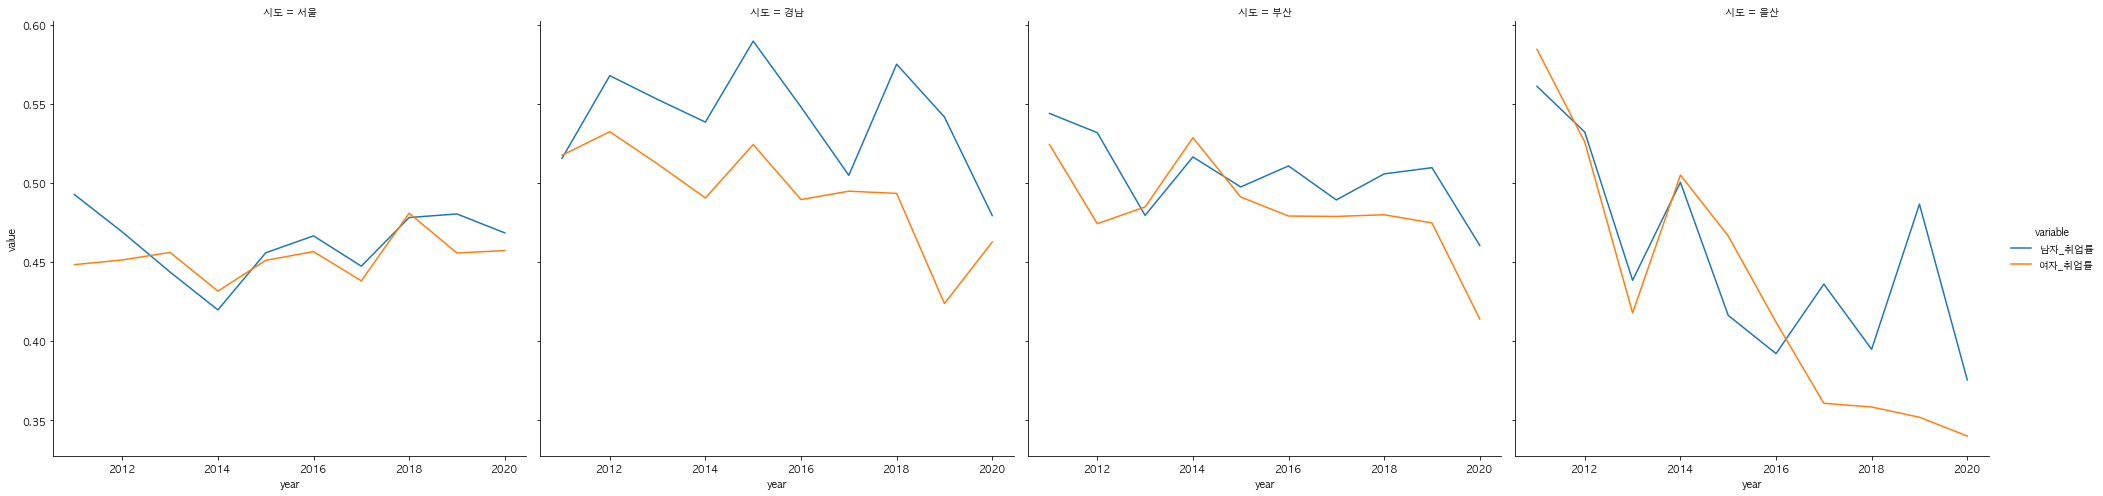

In [12]:
g = sns.relplot(data = sum121.query('variable in ["남자_취업률", "여자_취업률"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=4, col_order=['서울', '경남', '부산', '울산'])

# 중분류 시각화

## 공학계열
### Overall

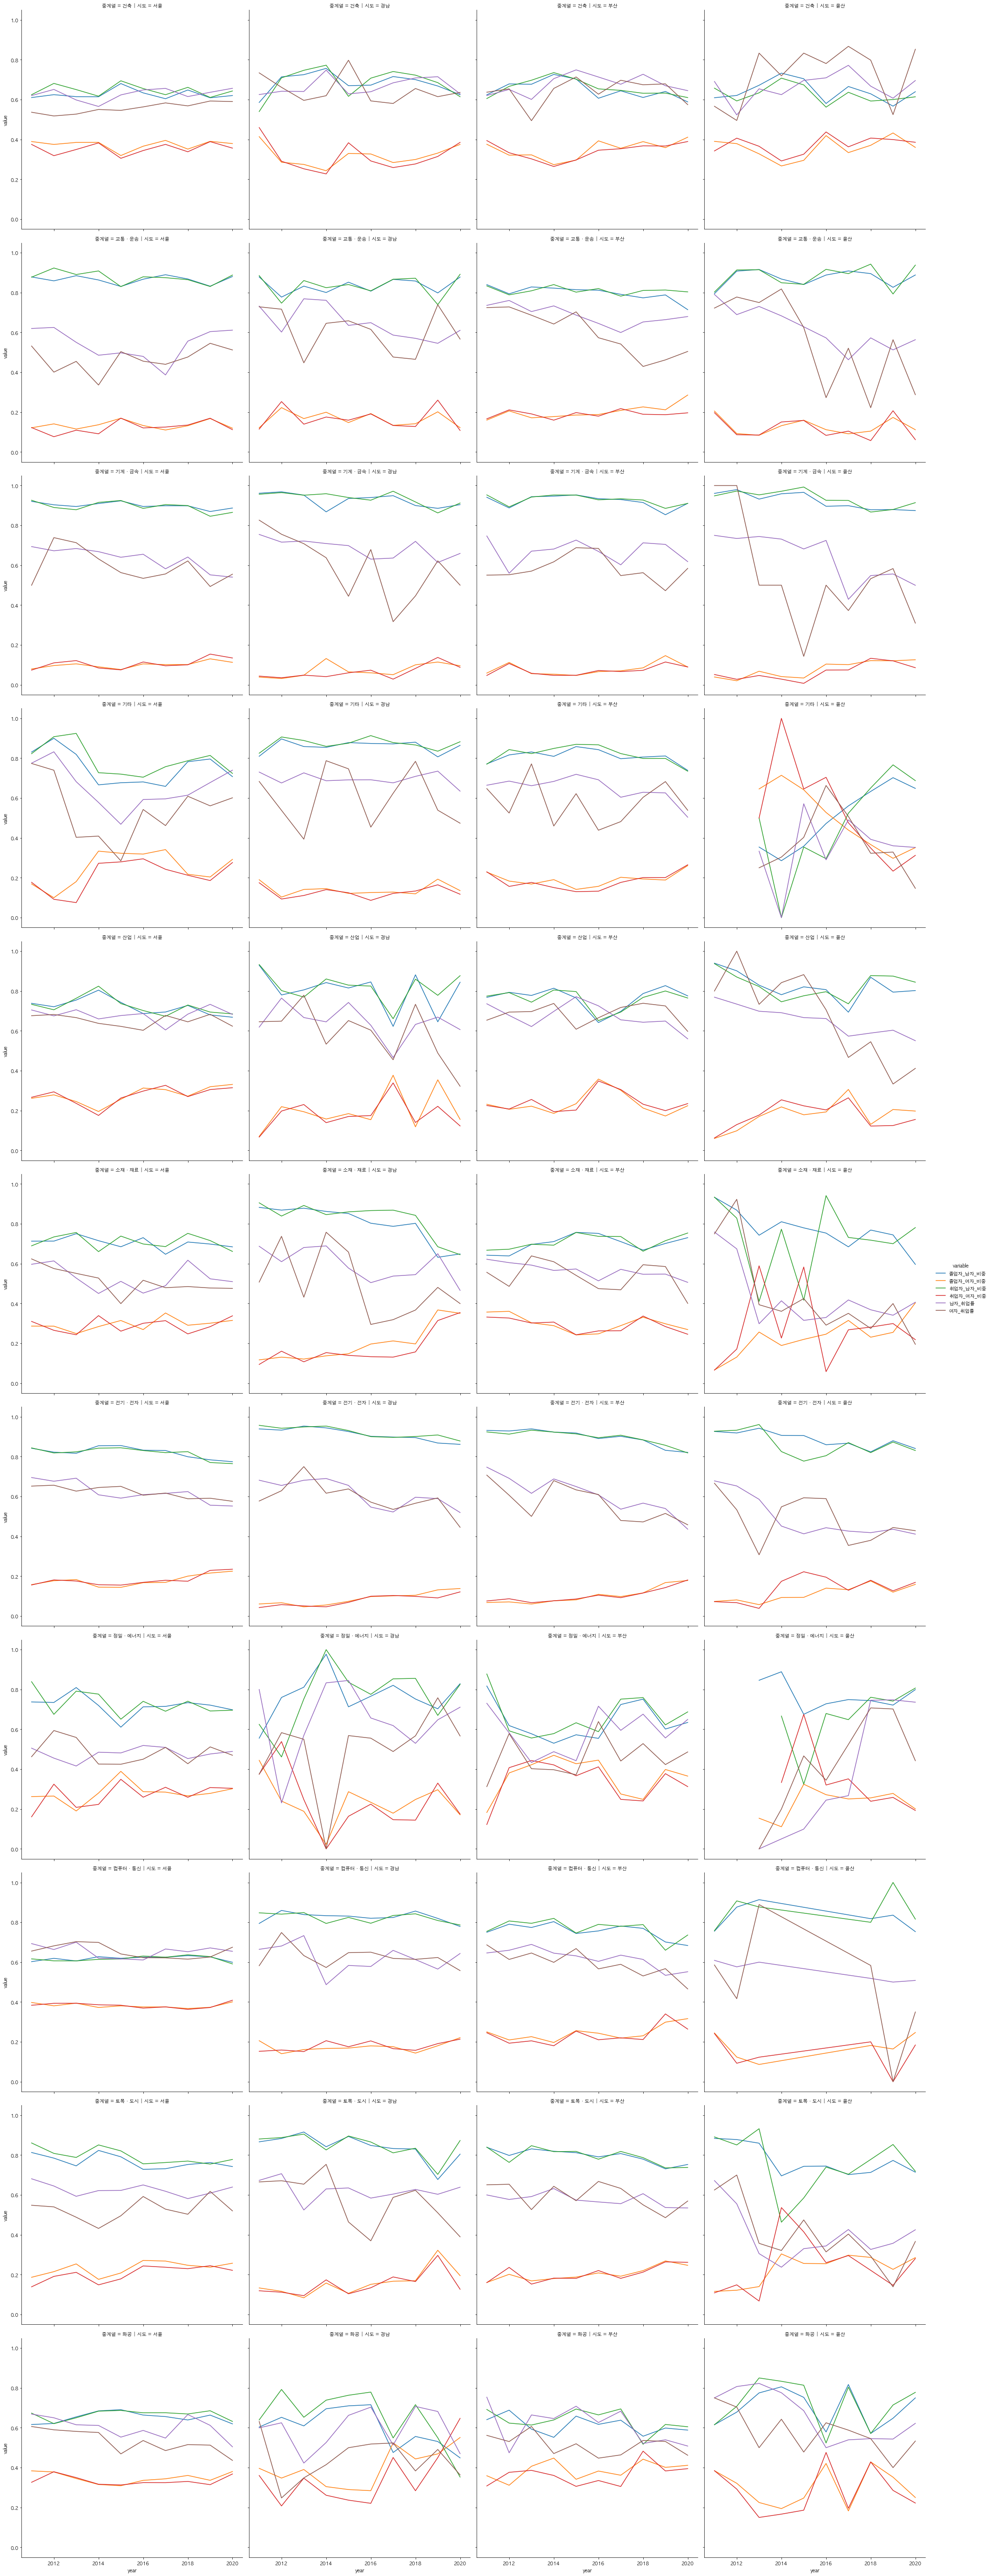

In [13]:
g=sns.relplot(data = sum211.query('variable != "전체_취업률"'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row = '중계열', col_order = ['서울', '경남', '부산', '울산'])

### 졸업자 중 남녀 비율

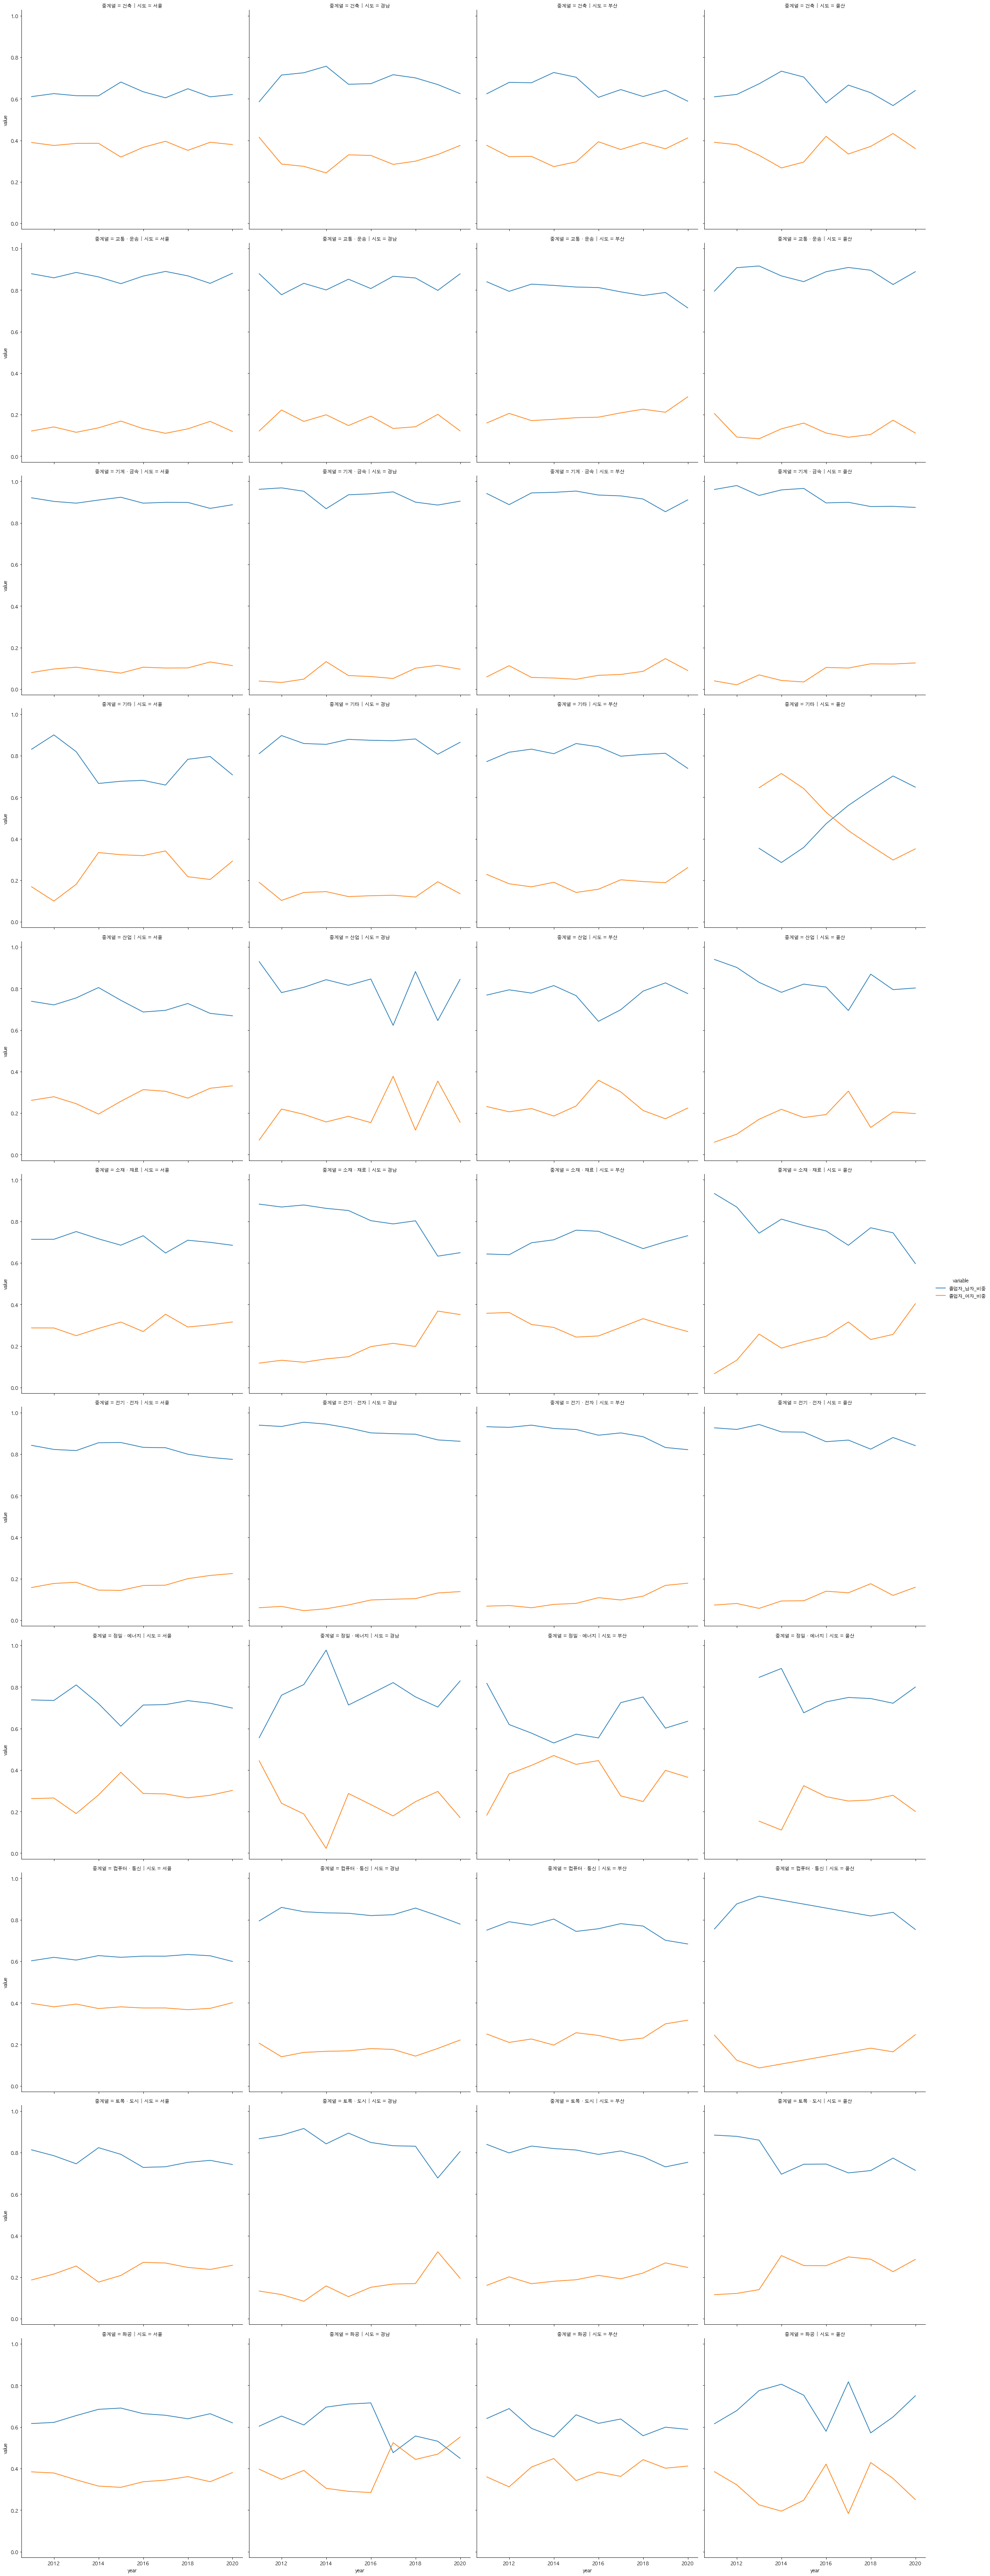

In [14]:
g = sns.relplot(data = sum211.query('variable in ["졸업자_남자_비중", "졸업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])

### 취업자 중 남녀 비율

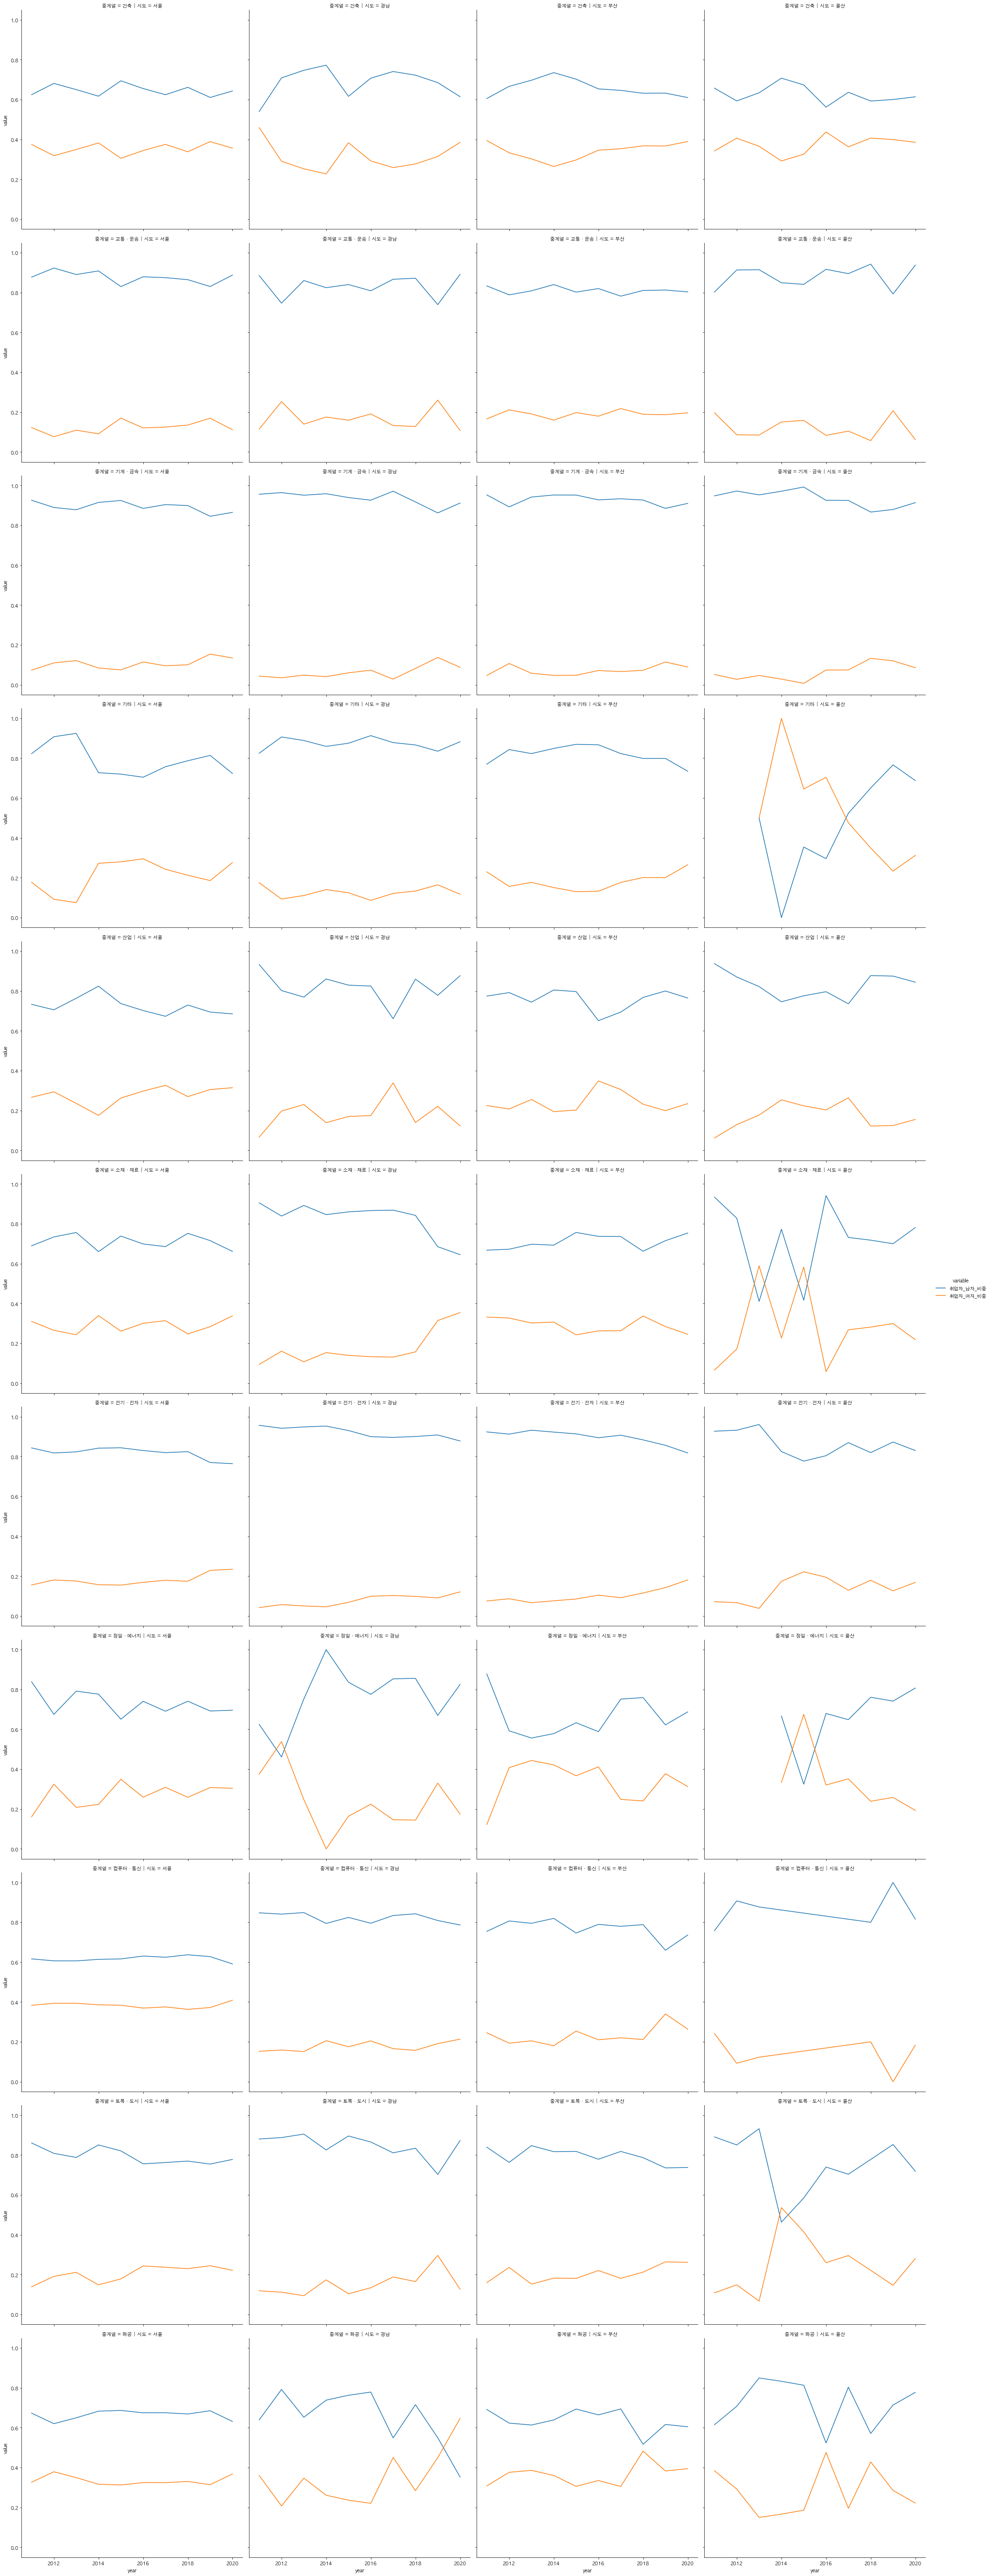

In [15]:
g = sns.relplot(data = sum211.query('variable in ["취업자_남자_비중", "취업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])

### 남녀 취업률

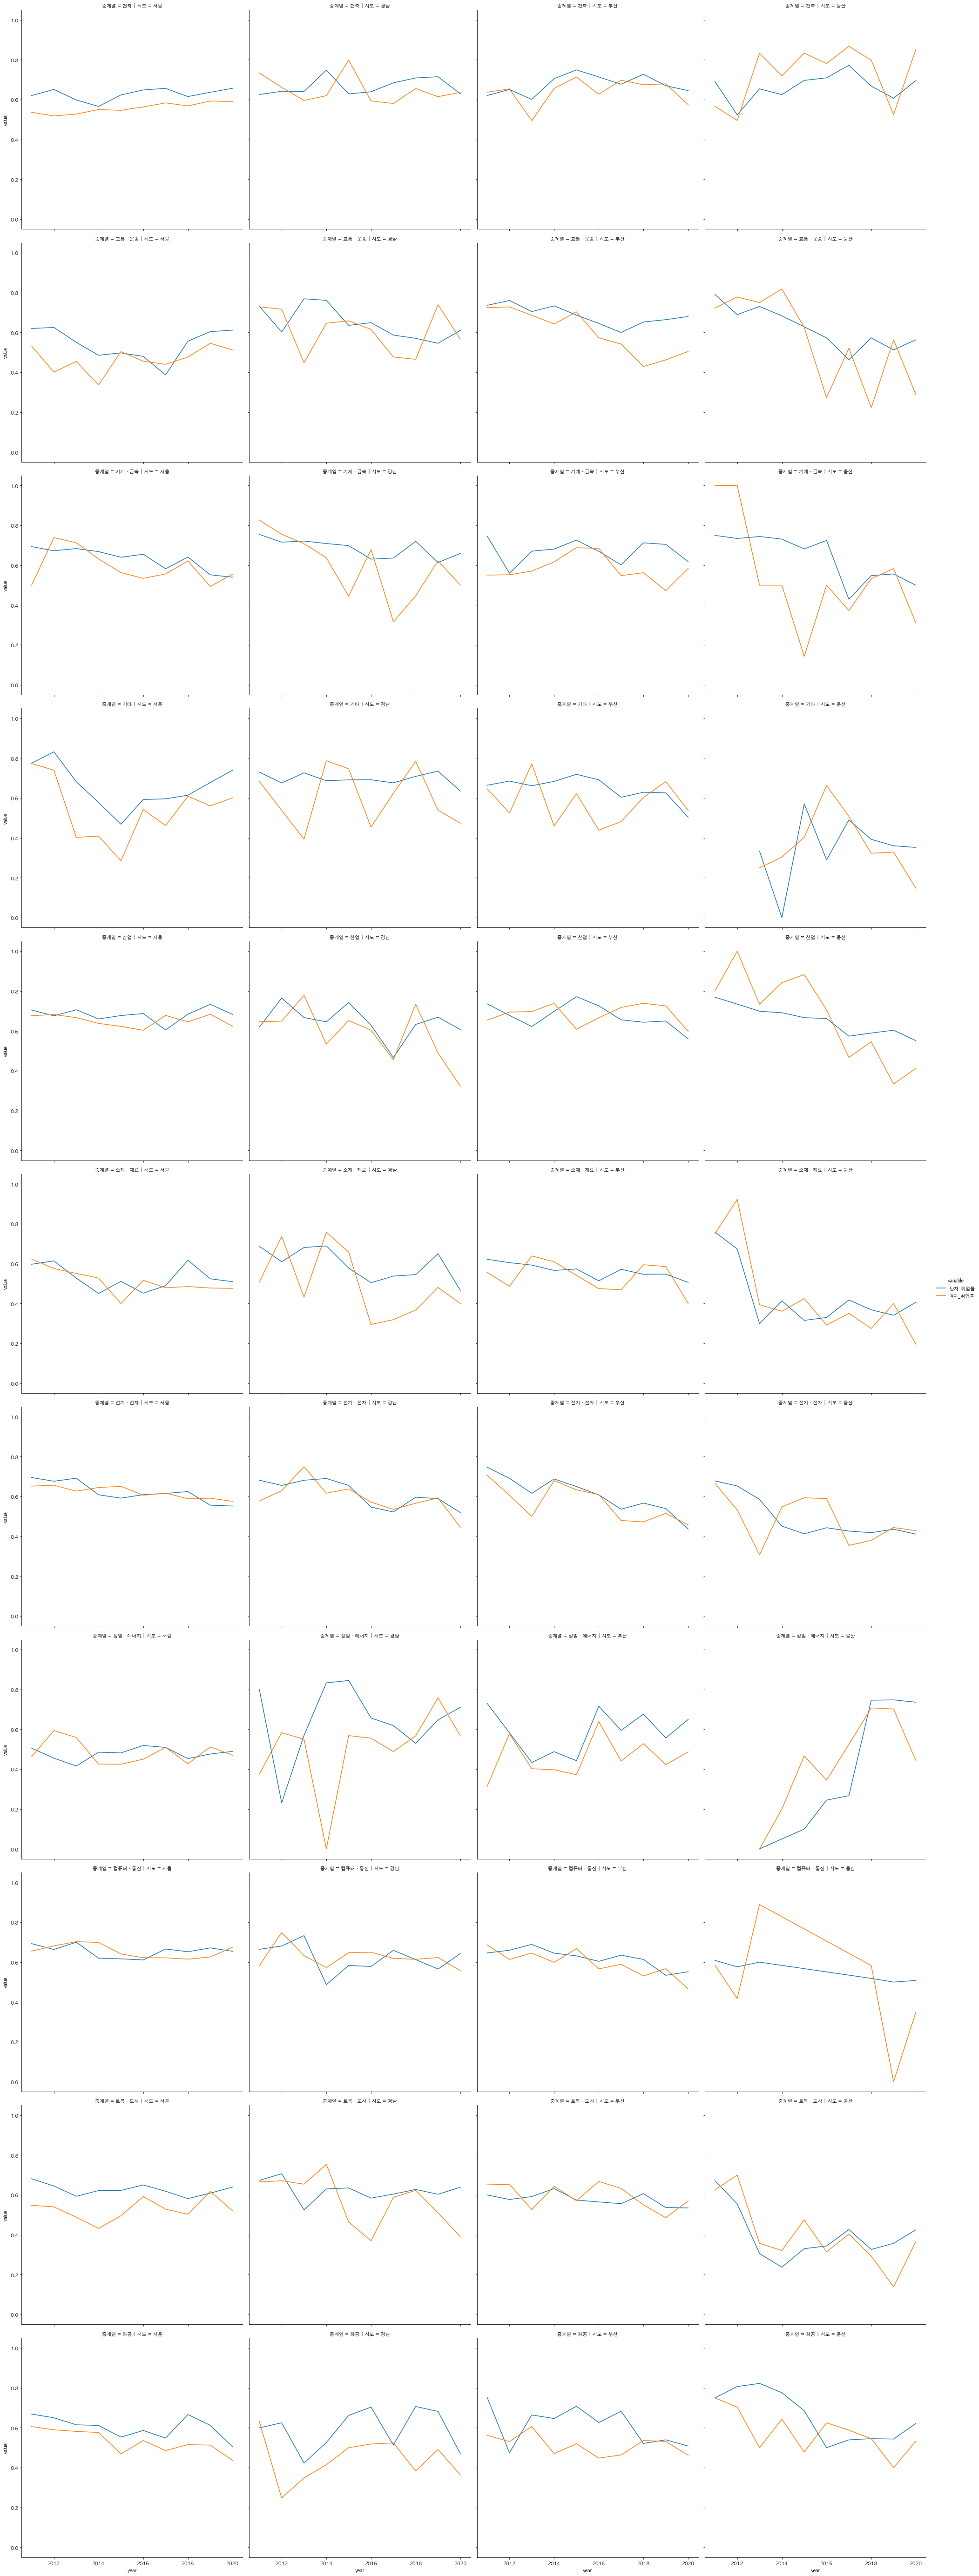

In [16]:
g = sns.relplot(data = sum211.query('variable in ["남자_취업률", "여자_취업률"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])

## 자연계열

### Overall

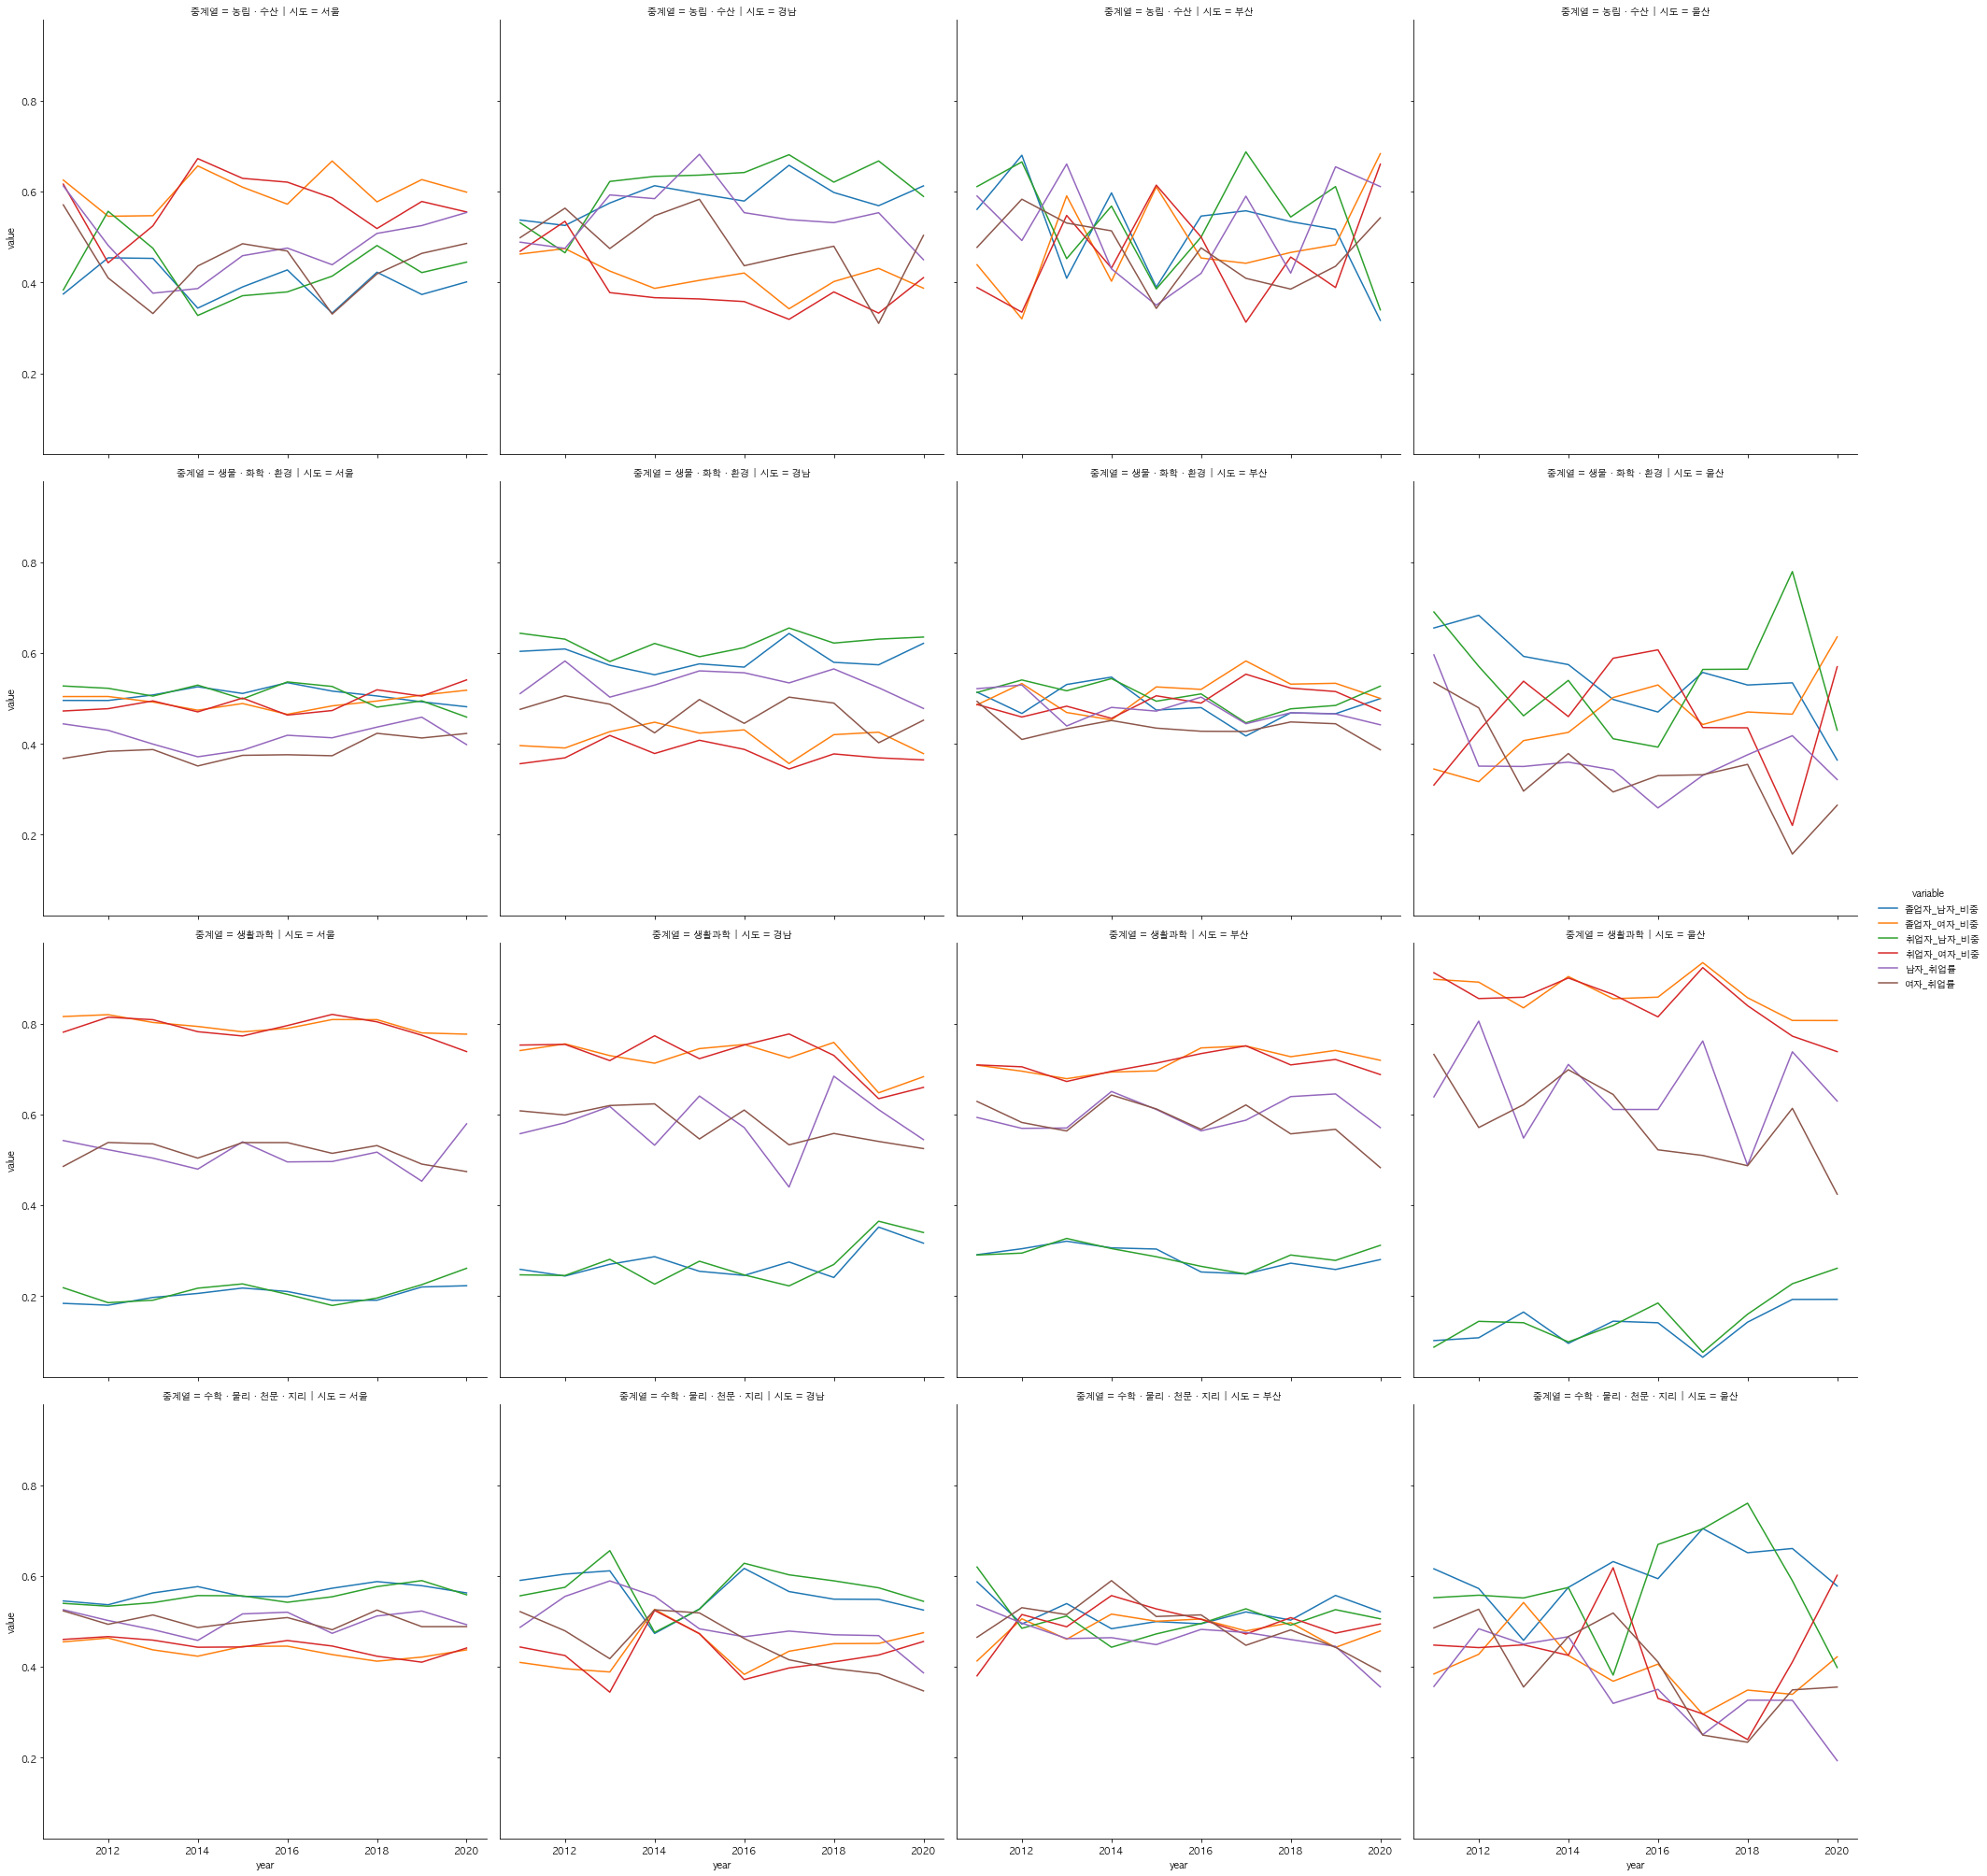

In [17]:
g=sns.relplot(data = sum221.query('variable != "전체_취업률"'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row = '중계열', col_order = ['서울', '경남', '부산', '울산'])

### 졸업자 중 남녀비중

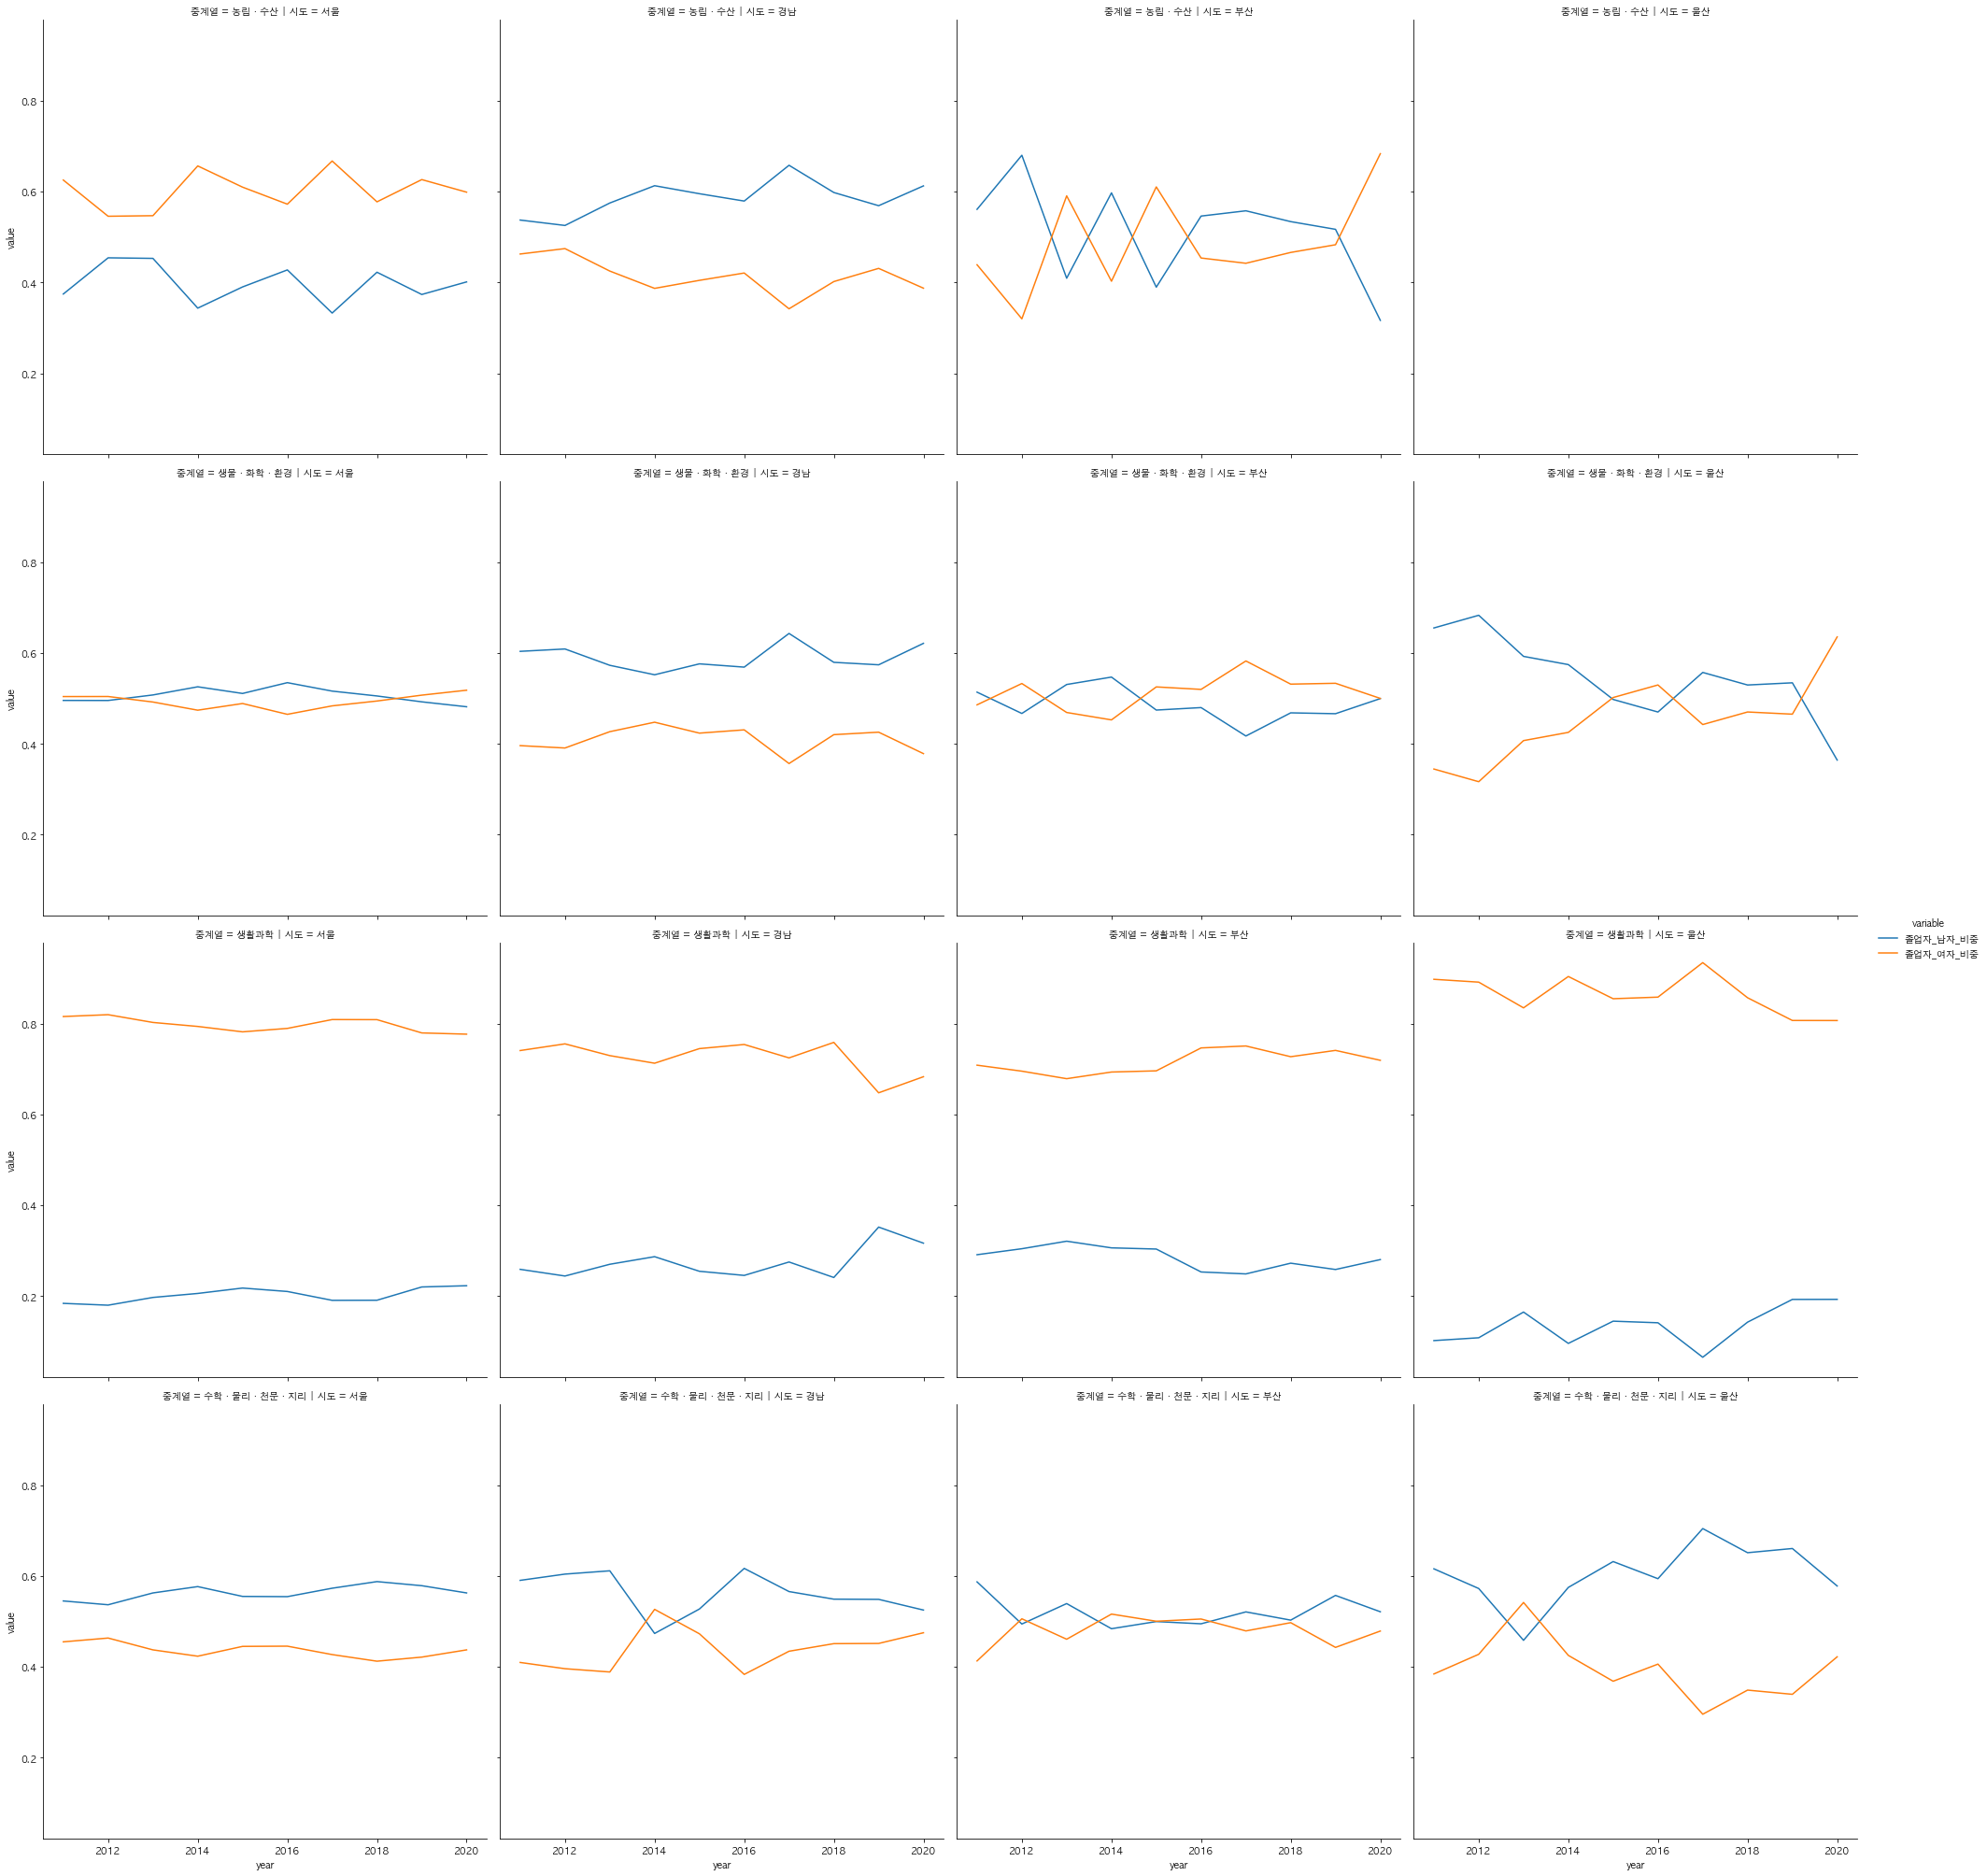

In [18]:
g = sns.relplot(data = sum221.query('variable in ["졸업자_남자_비중", "졸업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])

### 취업자 중 남녀비중

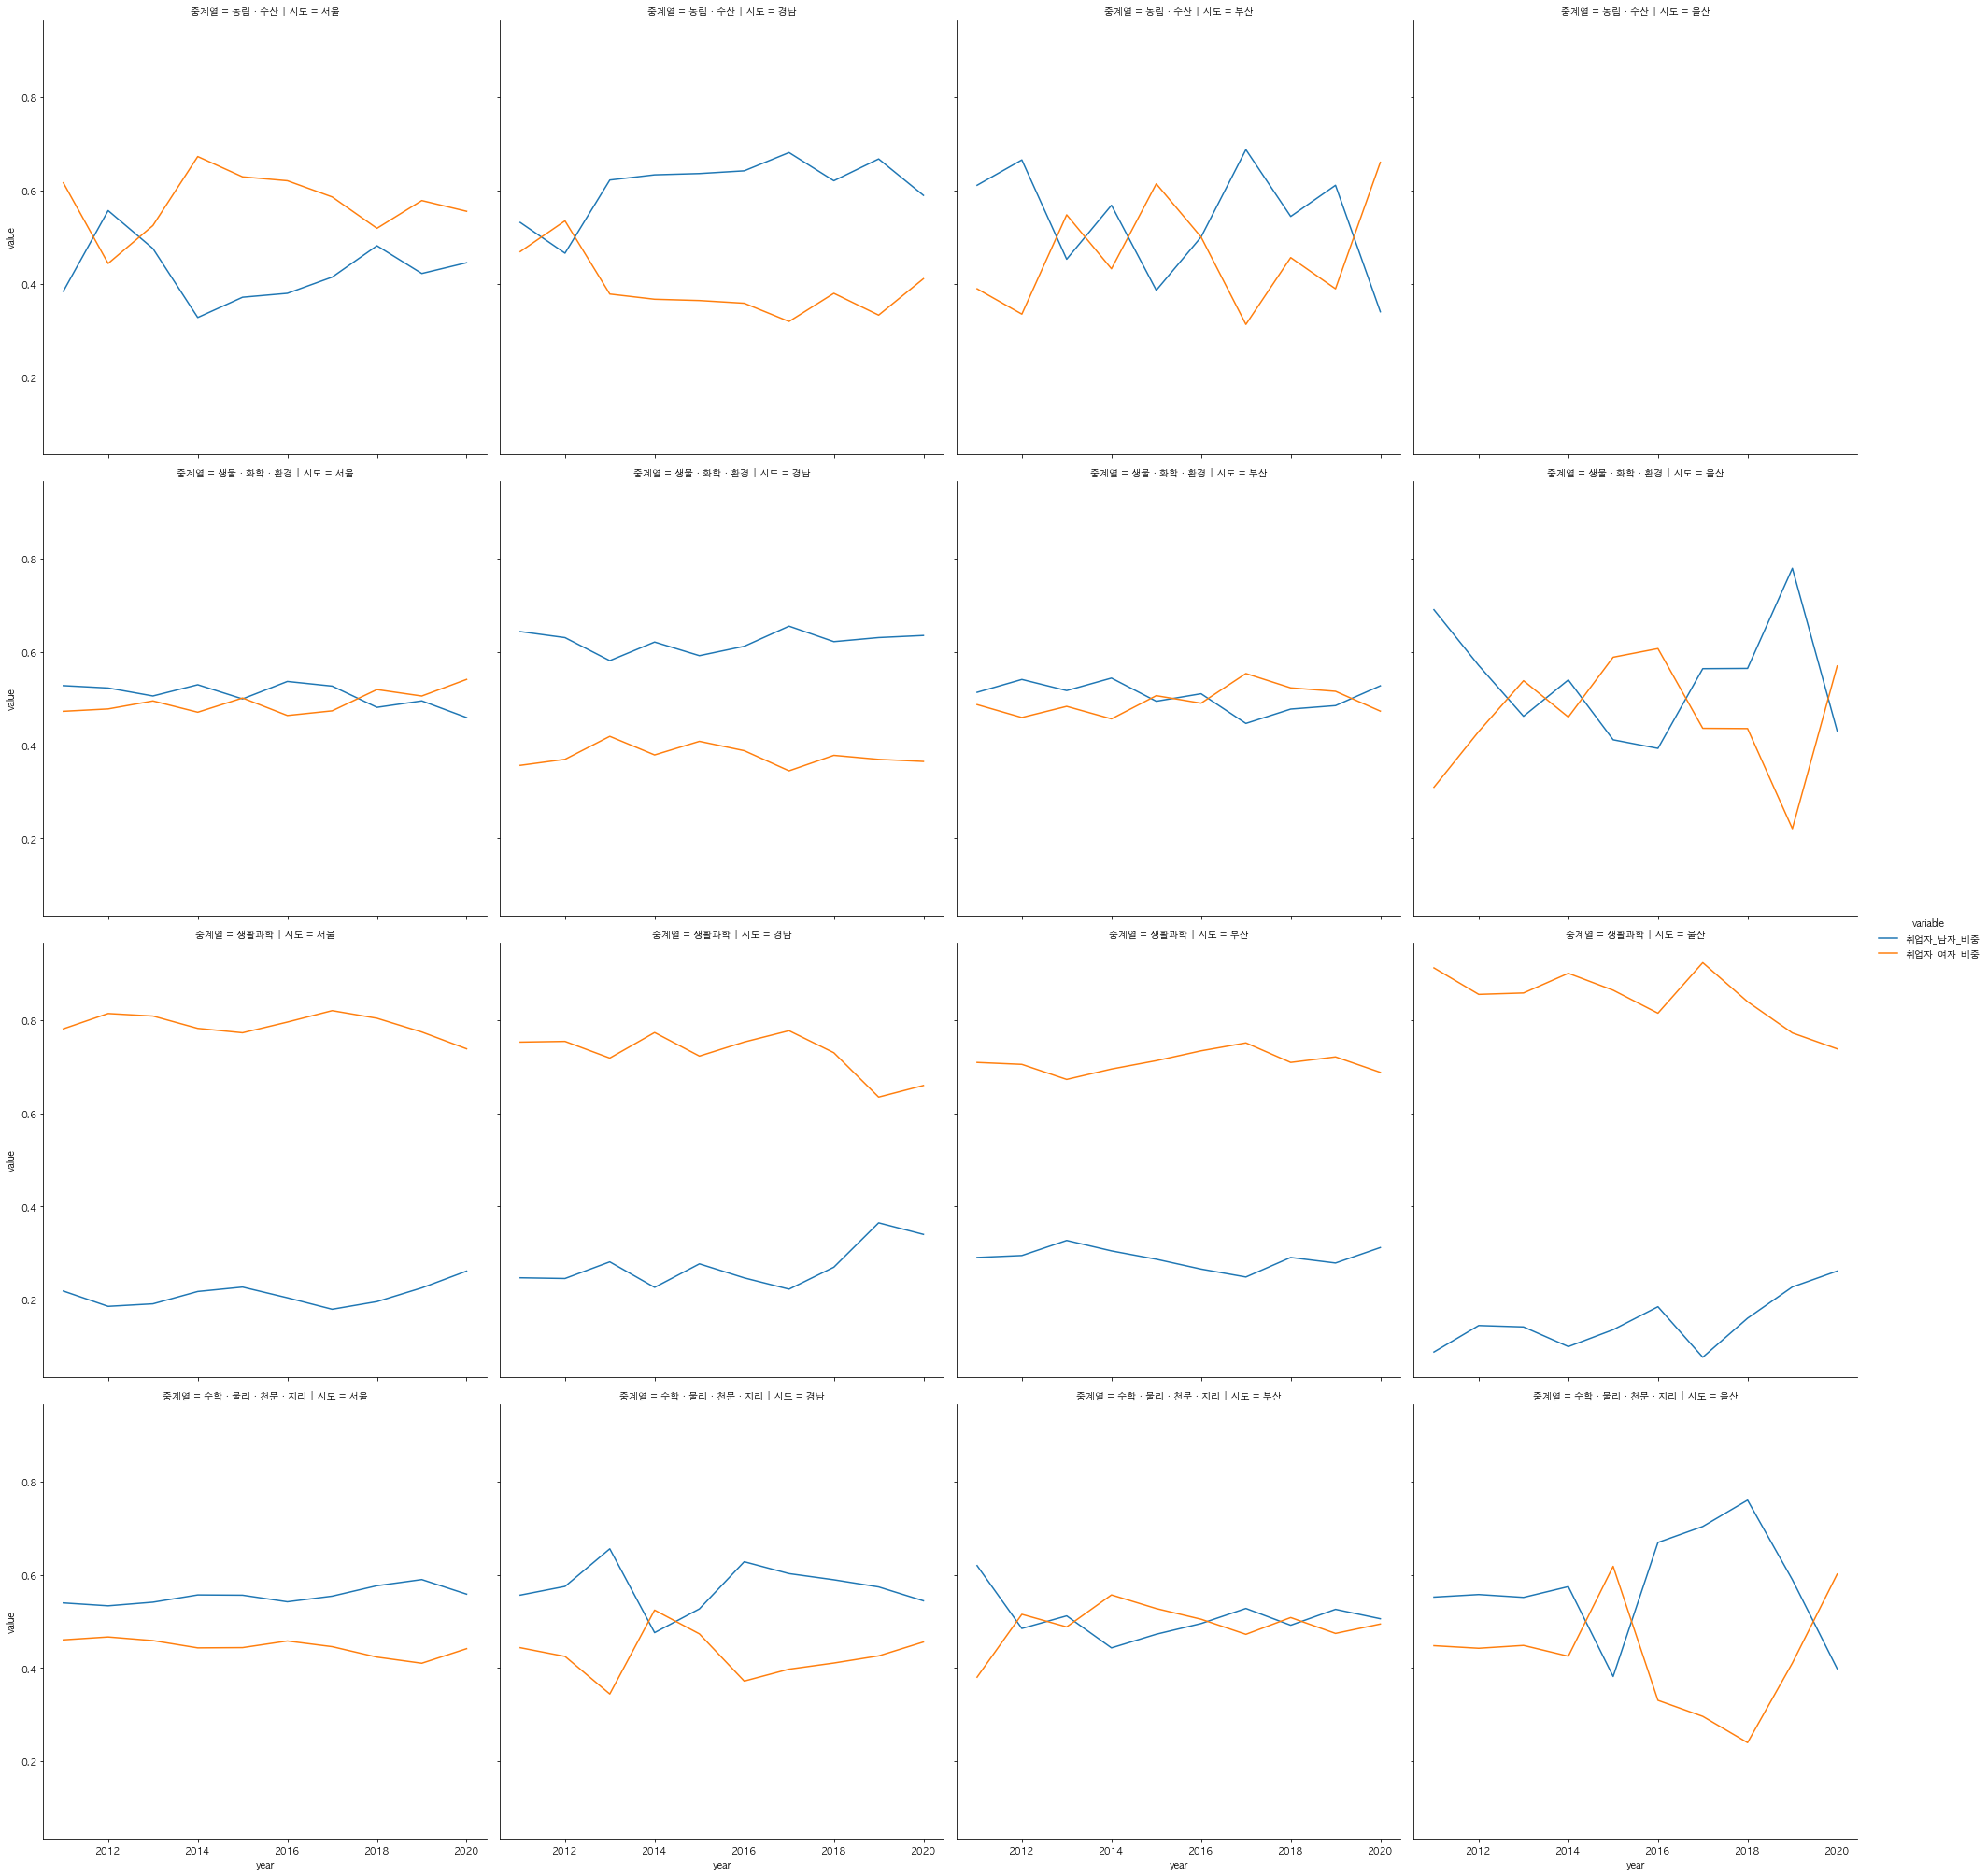

In [19]:
g = sns.relplot(data = sum221.query('variable in ["취업자_남자_비중", "취업자_여자_비중"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])

### 남녀 취업률

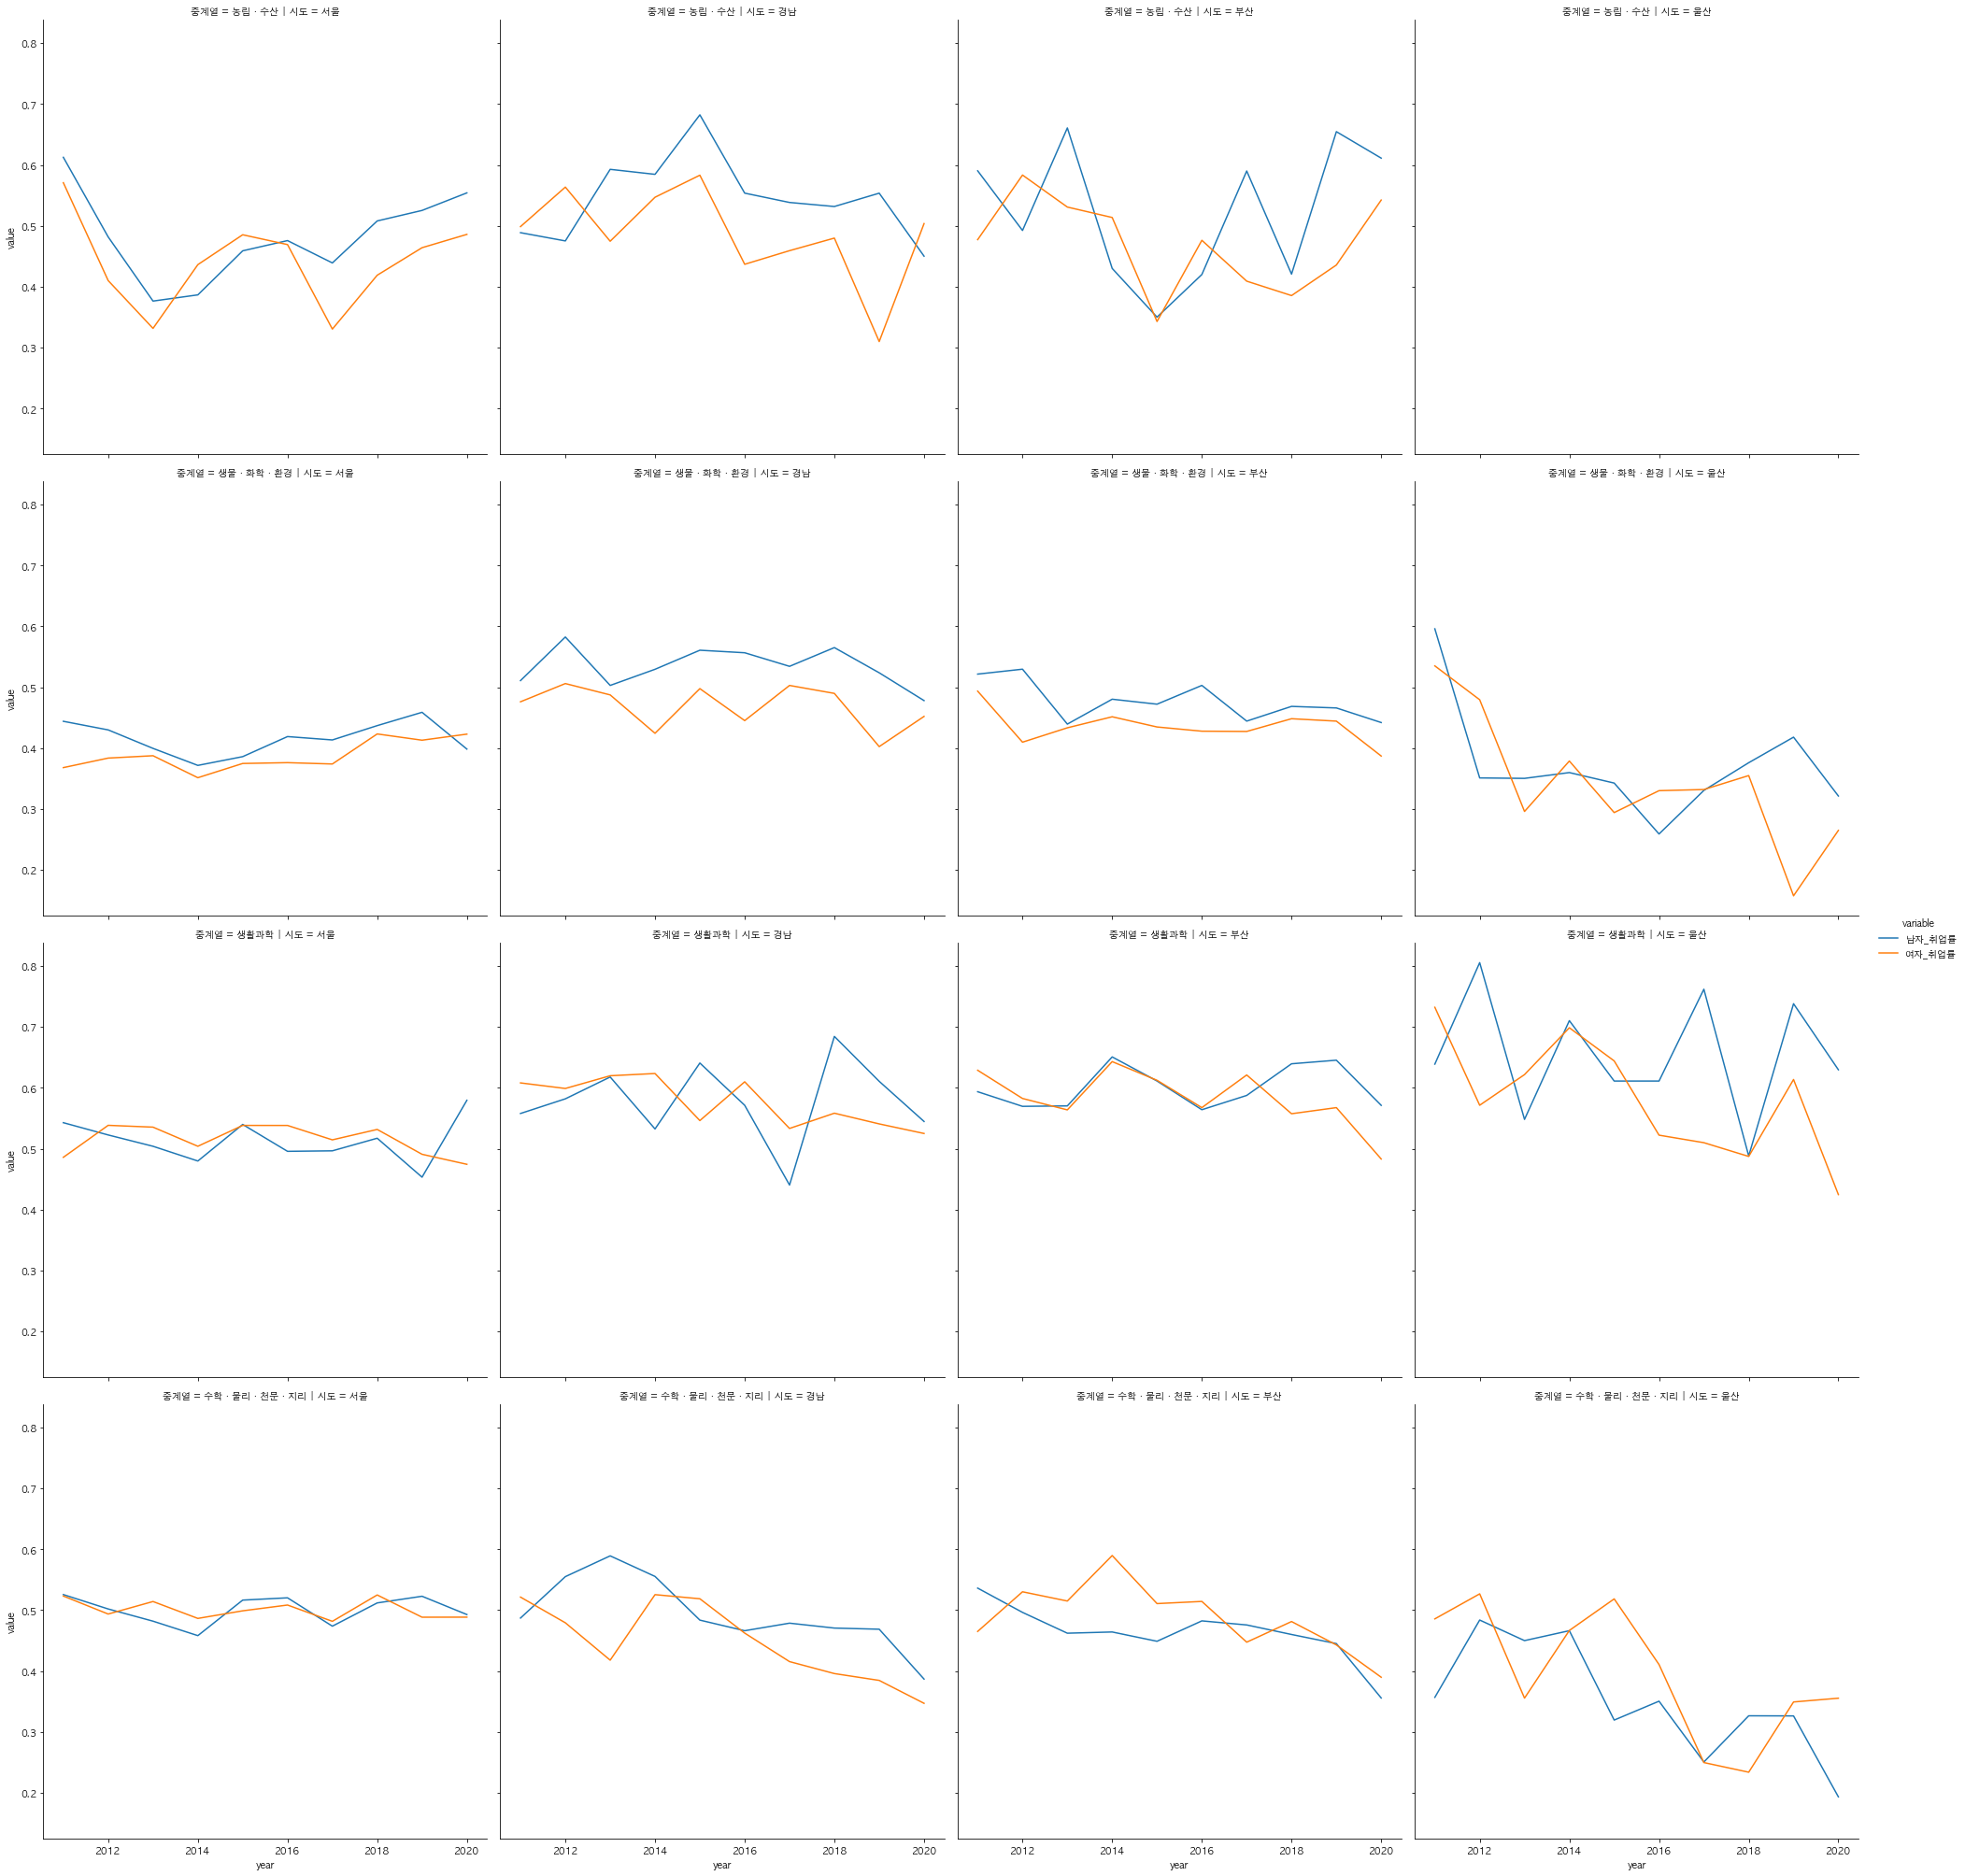

In [20]:
g = sns.relplot(data = sum221.query('variable in ["남자_취업률", "여자_취업률"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row='중계열', col_order=['서울', '경남', '부산', '울산'])